<a href="https://colab.research.google.com/github/dretcm/Deep-Learning-ACM/blob/main/Deep_Learning_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cómo funciona el aprendizaje supervisado en una Red Neuronal

---

**Datos importantes:**

* Fue gracias a un par de científicos que hicieron experimentos sorprendentes con el cerebro de un gato, que se da pie a lo que llamamos procesamiento de información visual.

* Cuando una neurona transmite información a otra neurona en una red biológica, existe un proceso que es básicamente una transferencia de electroquímicos entre dos neuronas. Durante el proceso de esta transmisión existe una intensidad muy alta, sin embargo, antes y después de este proceso la intensidad es muy suave casi nula.

* El cerebro humano tiene distintos modos de procesar información. La profundidad en la cual queda procesada la información, es importante (Deep Learning)

* Una Red Neuronal es una composición de elementos lineales y no lineales, de tal manera que cuando se conectan y se entrenan adecuadamente, permiten aproximar cualquier función matemática, es por esto que se le llama aproximador de función universal.

* El aproximador de función universal tiene la capacidad de separar clases de una forma no lineal.

* Las neuronas son unidades de información. Algo especial de las neuronas es que son básicamente matrices.

* Una neurona es una combinación lineal de entradas.

* Los pesos son responsables de proyectar un espacio matematico a otro.

**RED NEURONAL:**

INPUT --- WEIGHT ---> FUNC SIGMOID --- WEIGHT ---> .... --- SOFTMAX ---> OUTPUT

* PRACTICAMENTE SON PRODUCTOS MATRICIALES, O PRODUCTO ESCARLAR O PUNTOS, Y LA FUNCION SIGMOID HACE QUE NUESTROS VALORES ESTEN ENTRE 0 Y 1:

[V1, V2, V3]  x  [[W1, W2, W3], [W4, W5, W6]] ---> [H11, H12, H13]  x [[], [], []] ---> .... --- [H21, H22] ---> output

* En conclusion las neuronas son UNA COMBINACION LINEAL DE ENTRADAS.

**softmax:**
* Cinvierte todo lo anterior a probabilidades.

**Composicion de elementos lineales y no lineas:**

Básicamente significa que la salida de una función es la entrada de otra. For ejemplo, la composición de dos funciones f() y g() seria f(g(x)). Imagina que g es solo una combinación lineal de los datos de entrada x, pero la función f() modela interacción o combinaciones no lineales. Entonces, f(g(x)) seria una composición de elementos lineales y no lineales.

Lamentablemente, mucha de esta terminología viene de tópicos que escapan del ámbito de esta clase (algebra lineal, calculo en varias variables, etc.) y que no es una mala idea revisar en Khan Academy por ejemplo.

**Las Redes Neuronales como una Composición de Piezas**

---


![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/overview.png)

La figura de arriba muestra algo de la matemática usada para entrenar una red neuronal. Haremos sentido de esto durante el artículo. Una red neuronal es una pila de módulos con diferentes propósitos:

* Entrada X alimenta la red neuronal con datos sin procesar, la cual se almacena en una matriz en la cual las observaciones con filas y las dimensiones son columnas.
* Pesos W1 proyectan entrada X a la primera capa escondida h1. Pesos W1 trabajan entonces como un kernel lineal.
* Una función Sigmoid que previene los números de la capa escondida de salir del rango 0-1. El resultado es un array activaciones neuronales h1 = Sigmoid(WX).


**¿Por qué hacer debugging de modelos de aprendizaje de máquina es una tarea compleja?**

Por experiencia, los modelos matemáticos no funcionan como es esperado al primer intento. A veces estos pueden darte una exactitud baja para datos nuevos, tomar mucho tiempo de entrenamiento o mucha memoria RAM, devolver una gran cantidad de falsos negativos o valores NaN (Not a Number), etc. Déjame mostrarte algunos casos donde saber cómo funciona el algoritmo puede ser útil:

* Si toma mucho tiempo para entrenar, es quizás una buena idea incrementar el tamaño del mini-batch o array de observaciones que alimentan a la red neuronal (o sea los inputs de las neuronas), para reducir la varianza en las observaciones y así ayudar al algoritmo a converger.

* Si se observa valores NaN, el algoritmo ha recibido gradientes con valores muy altos produciendo desborde de memoria RAM. Piensa esto como una secuencia de multiplicaciones de matrices que explotan después de varias iteraciones. Reducir la velocidad de aprendizaje tendrá el efecto de escalar estos valores. Reduciendo el número de capas reducirá el número de multiplicaciones. Y poniendo una cota superior a los gradientes (clipping gradients) controlará este problema explícitamente.

# Evaluciones de Errores

---



**Función de costo, supuestos y probabilidad:**

**Datos importantes:**

* Una función de error o loss function es básicamente la forma como una red neuronal sabe si está haciendo un buen trabajo o no.

* La gradiente o la primer derivada de una función con respecto a los pesos está siempre orientada al lugar donde se reduce más la función de error. Esto nos permite saber si la red neuronal está aprendiendo o no.

* En la vida real las funciones son no convexas, esto quiere decir que podemos tener distintas soluciones para un mismo problema. Este es uno de los motivos por los cuales toma tanto tiempo entrenar una red neuronal artificial.

best video: [link text](https://www.youtube.com/watch?v=A6FiCDoz8_4&t=8s)

**Ejemplo:**

* si ponemos a una persona en medio del decierto con los ojos vendados, y le decimos que llegue al punto más bajo, lo que podria hacer es caminar hacia el lugar donde sea más profundo, se guiaria por sus pies, vera que hay una bajada y seguira hasta que no pueda bajar más.

**Learning Rate:**

* si seguimos el ejemplo anterior, sería la distancia con que se mueve, si es baja dimorara mucho en encontrar el lugar más bajo, y si es muy alta estara dando pasos gigantescos los cuales no le permitirian saber cual es el lugar más bajo y nunca encontraría el punto más bajo.

**Un Ejemplo Concreto: Aprendiendo la Función XOR**

---

Abramos la caja negra. Construiremos a continuación una red neuronal desde cero que aprende la función XOR. La elección de esta función no lineal no es por casualidad. Sin backpropagation seria difícil aprender a separar clases con una línea recta.

Para ilustrar este importante concepto, note a continuación cómo una línea recta no puede separar 0s y 1s, las salidas de la función XOR. Los problemas reales también son linealmente no separables

![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/nonlinear_xor.png)

**La topología de la red es simple:**

* Entrada X es un vector de dos dimensiones
Pesos W1 son una matriz de 2x3 dimensiones con valores inicializados de forma aleatoria
* Capa escondida h1 consiste de 3 neuronas. Cada neurona recibe como entrada la suma de sus observaciones escaladas por sus pesos, este es el producto punto resaltado en verde en la figura de abajo: z1 = [x1, x2][w1, w2]
* Pesos W2 son una matriz de 3x2 con valores inicializados de forma aleatoria
* Capa de salida h2 consiste de 2 neuronas ya que la función XOR retorna 0 (y1=[0,1]) o 1 (y2 = [1,0])

Mas visualmente:

![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/overview2.png)

Entrenemos ahora el modelo. En nuestro ejemplo los valores entrenables son los pesos, pero tenga en cuenta que la investigación actual está explorando nuevos tipos de parámetros a ser optimizados. Por ejemplo: atajos entre capas, distribuciones estables en las capas, topologías, velocidades de aprendizaje, etc.

**Backpropagation** es un método para actualizar los pesos en la dirección (gradiente) que minimiza una métrica de error predefinida, conocida como Función de Pérdida on función de costo, dado un conjunto de observaciones etiquetadas. Este algoritmo ha sido repetidamente redescubierto y es un caso especial de una técnica mas general llamada diferenciación automática en modo acumulativo reverso.

**Inicialización de la red**

---


Inicialicemos los pesos de la red con valores aleatorios.

![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/initialized_network.png)


**Propagación hacia adelante:**

* El objetivo de este paso es propagar hacia delante la entrada X a cada capa de la red hasta calcular un vector en la capa de salida h2.

**Es así como sucede:**

* Se proyecta linealmente la entrada X usando pesos W1 a manera de kernel:

![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/z1.png)

* Se escala esta suma z1 con una función Sigmoid para obtener valores de la primera capa escondida. Note que el vector original de 2D ha sido proyectado ahora a 3D.


![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/h1.png)

* Un proceso similar toma lugar para la segunda capa h2. Calculemos primero la suma z2 de la primera capa escondida, la cual es ahora un vector de entrada.

![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/z2.png)

* Y luego calculemos su activación Sigmoid. Este vector [0.37166596 0.45414264] representa el logaritmo de la probabilidad o vector predecido, calculado por la red dado los datos de entrada X.

![link text](https://raw.githubusercontent.com/omar-florez/scratch_mlp/master/docs/assets/h2.png)

**Calculando el error total**

* También conocido como “valor real menos predecido”, el objetivo de la función de pérdida es cuantificar la distancia entre el vector predecido h2 y la etiqueta real proveída por un ser humano, y.

* Note que la función de pérdida contiene un componente de regularización que penaliza valores de los pesos muy altos a manera de una regresión L2. En otras palabras, grandes valores cuadrados de los pesos incrementaran la función de pérdida, una métrica de error que en realidad queremos reducir.

video de backpropagation: [link text](https://www.youtube.com/watch?v=eNIqz_noix8)

# Optimización Matemática

---



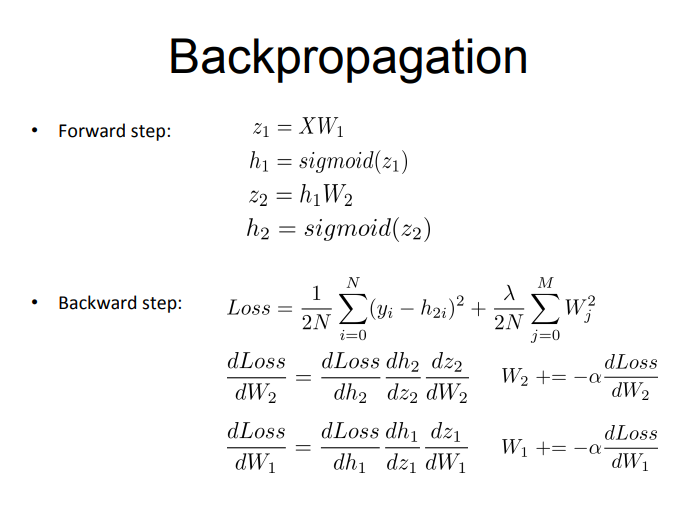

**Nota:** el simbolo "α" o alpha es la velocidad con que aprende el modelo o 'learning rate'.

know more: [link text](https://static.platzi.com/media/tmp/class-files/git/scratch_mlp/scratch_mlp-master/slides/2017_Summer_School_LACCI.pdf)

LINK DERIVADA PARA MINIMOS: [link text](https://www.universoformulas.com/matematicas/analisis/maximos-minimos-funcion/)

**BackPropagation:** 

* El trabajo que hace el backpropagation es actualizar los pesos de nuestra red neuronal (mediante la penalizacion 'W += -α dLoss/dW), para así reducir la funcion de coste o perdida de nuestra prediccion, y saber que nuestra red neuronal esta aprendiendo, y asi nuestra red neuronal generaliza los datos y aproxima poco a poco sus respuesta a las correctas.

**Cuál es el algoritmo de retropropagación:**

Datos importantes:

1. Los gradientes son básicamente la primer derivada de una función con respecto a un determinado parámetro. En este caso la función es la función de costo o perdida, y el parámetro es cada uno de los pesos en una red neuronal.
2. La técnica de Backpropagation es responsable de separar de forma no lineal distintas clases que se encuentran en la vida real.
3. El algorimo de Backpropagation se compone de dos pasos:

a) Forward Step o paso hacia delante. 

En éste tenemos una proyección de matrices. Tenemos datos de entrada, los pesos y una proyección de los datos de entrada a un nuevo espacio.

b) Backward Step o paso hacia atrás.

La función de activación no lineal permite encontrar el valor de la primera capa escondida de una red neuronal y se hace una proyección con los pesos, para así obtener el valor sigmoid de esa combinación lineal.

Explicacion de Penalizacion : [link text](https://platzi.com/clases/1180-redes-neuronales-2017/9010-propagacion-hacia-atras/)

VIDEO DE BackPropagation DotCSV : [link text](https://www.youtube.com/watch?v=M5QHwkkHgAA&t=1s)

# ¿Qué es la Inteligencia Artificial (IA), Machine Learning y Deep Learning?

---



* **Inteligencia Artificial:** Tratar de imitar las cosas que nosotros consideramos inteligentes en los seres humanos.

* **Machine Learning:** Habla de que un algoritmo puede ser entrenado con datos pasados de modo que puede predecir el futuro.

* **Deep Learning:** Las redes neuronales a través de las cuales hacemos Machine Learning se dividen en capas, entre más profunda es una capa, es mucho más exacta y puede crear funciones más sofisticadas para poder predecir el futuro.

Diccionario de ML: [link text](https://github.com/capitalone/AI_Dictionary_English_Spanish/blob/master/release/AI_Dictionary.pdf)

TODO SOBRE EL CURSO: [link text](https://static.platzi.com/media/public/uploads/curso_deeplearning_3f071524-8718-41f3-a848-10f2b8fd11c3.pdf)

* **Affective Computing:** de como una algoritmo clasifica o aproxima un comentario, emoji, etc. Como un estado sentimental.

* **Neurona:** Es la mínima cantidad de información que podemos procesar en una red neuronal.

* Una neurona recibe datos de entrad, las procesa y genera un valor

* La función de activación agrega un nivel de no linealidad al procesamiento de la información.

* Como función de activación está el sigmoid function.
entrada = z, z = sumatoria de todos los dato_entrada*peso, A esta operación se le denomina producto punto (entre el dato de entrada y el peso - Algebra lineal)

* Elegir una función de activación depende en gran medida de la primera derivada de ésta función.

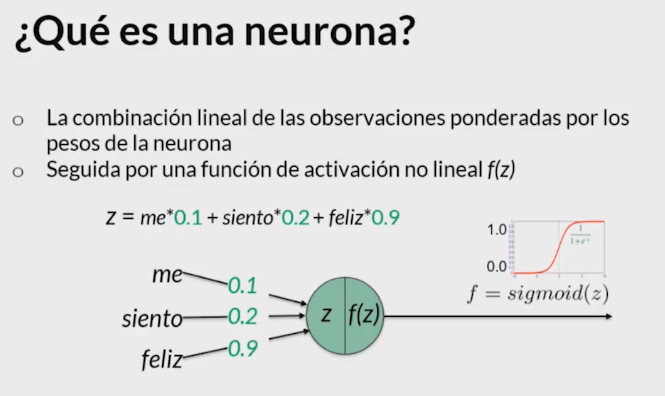

**IMPORTANTE:** las funciones de activacion de una red neuronal, las cuales su primera derivada es muy alta conforme se esta acercando a 'cero', las cuales indican que la red neuronal se le sea más facil o tiendan a aprender nuevos conceptos. Entonces si vamos a inicializar una red neuronal debemos inicializar nuestros datos a un valor cercano a '0'.

R**ed Neuronal:**

* Es una estructura de neuronas.
*Es una distribución de neuronas en distintas capas que están conectadas por pesos.
* Se compone de capa de entrada, capas escondidas, y capa de salida.
* La predicción se da cuando pasa por una función llamada softmax. estas predicciones son comparadas con labels.
* Los pesos se almacenan en matrices. Las filas representan el número de neuronas en la etapa anterior y el número de columnas representan el número de neuronas en la etapa actual.
* Composición: La salida de una neurona, es la entrada de otra.
* Regla: El secreto de Deep Learning es su capacidad para crear vectores que contienen transformaciones complejas de los datos de entrada. Mientras más capas posee una red neuronal, será más profunda y creará mejores características para clasificar.
* Un algoritmo es tan inteligente como la calidad de datos de entrada.

**Función softmax(z)**

* La salida de nuestros datos (log-probabilities) que son la salida no normalizadas de una red neuronal, que ese resultado no es entendible normalmente para el ojo humano, para eso usaremos la funcion '**softmax**' la cual es una funcion probabilistica, donde al sumar cada uno de los elementos vendrian a ser el 100 %. 

![link text](https://static.platzi.com/media/user_upload/softmax-6b933d4a-ee31-445e-8635-e6fba8829732.jpg)

**Navegando la superficie de error con gradientes**

---

* Si la primer derivada de la función loss / coste es mayor a cero, indica que está subiendo, está encontrando valores de error más altos.
* Si la primer derivada de la función loss / coste es menor a cero, indica que está bajando, está encontrando valores de error bajos, estamos en la dirección correcta.
* Si el valor de la primer derivada de la función loss es muy cercana a cero, podríamos estar en un máximo o en un mínimo.
* El objetivo es cambiar los pesos de la N.N (parámetros entrenables) un pequeño paso en la dirección que minimice el error / loss.
* Pasos: función de loss, gradiente, actualización de los pesos.
* El aumento del learning rate hace que encontremos el mínimo local rápidamente, pero así mismo podemos pasar a un nuevo mínimo, pero puede tener un gradiente positivo.
* Saddle point: cuando elementos en el proceso de entrenamiento son mínimos y máximos al mismo tiempo.
* SGD: stochastic Gradient Descent.
* Cuando un algoritmo de DL dimora mucho en entrenar, significa o puede decir que encontro muchos saddle points, para solucionarlo: 
1. disminuir el learning rate en el tiempo.
2. usa una funion de activacion ReLu, tanh,etc.
3. usar una optimizador adaptativo (Adam, tf.train.AdamOptimizer())

* Sin embargo, optimizadores mas modernos como Adam (Adaptive Moment Estimation) permiten calcular la media y varianza de la gradiente de cada parametro entrenable, adaptando el learning rate de forma adaptativa para cada parametro. Es decir, si la gradiente de un peso no muestra mucha variacion con el tiempo, su learning rate sera menor y por lo tanto la actualizacion de este parametro sera mucho mas conservador. 

# Algoritmos de Deep Learning y Redes Neuronales

---



Modelos:

**Modelo #2:MLP(Multi Layer Perceptron):** Tiene una o más capas ocultas.

**Modelo #3:LSTM(Long-Short Term memory):** Son réplicas de MLP en distintas instancias de tiempo.

**Modelo #1: Logistic Classifier:**  No tiene capas intermedias

En cada modelo el problema es el mismo: reducir la función de error.

**Modelo #1: Logistic Classifier:**
* siplemente un clasificacion de: **h = softmax(XW)**

In [ ]:
'''

Emotion classification with a Logistic classifier
@author: Omar U. Florez

'''

import tensorflow as tf
#import ipdb


# Model:
#   Data transformation:
#       - [Batch size, seq_max_len] -> [Batch size, seq_max_len, vocab_size]
#       - [Batch size, seq_max_len, vocab_size] -> [Batch size, seq_max_len * vocab_size]
#   Neural Network architecture:
#       - output = [Batch size, seq_max_len * vocab_size] x [seq_max_len * vocab_size, num_classes]
#       - logits = Sigmoid(output)
#       - probabilities = Softmax(logits)
class LogisticClassifier:
    def __init__(self, seq_max_len, state_size, vocab_size, num_classes):
        # Maximum number of units in the input (e.g., words)
        self.seq_max_len = seq_max_len
        # Number of dimensions of the internal memory (for LSTM and MLP)
        self.state_size = state_size
        # Number of unique characters defining input data
        self.vocab_size = vocab_size
        # Number of output classes
        self.num_classes = num_classes

    def build_model(self):
        self.x = tf.placeholder(shape=[None, self.seq_max_len], dtype=tf.int32)
        # Convert word ids from the input into ortogonal vectors
        # Forming the input representation for the Logistic algorithm:
        #       - [Batch size, seq_max_len] -> [Batch size, seq_max_len, vocab_size]
        x_one_hot = tf.one_hot(self.x, self.vocab_size)
        x_one_hot = tf.cast(x_one_hot, tf.float32)


        # Forming the output representation for the Logistic algorithm using one-hot encoding:
        #       - [Batch size, 1] -> [Batch size, num_classes]
        self.y = tf.placeholder(shape=[None], dtype=tf.int32)
        self.y_onehot = tf.one_hot(self.y, self.num_classes, dtype=tf.float32)
        self.batch_size = tf.placeholder(tf.int32, [], name='batch_size')

        # Define weights for output decoding
        weights = {
            'layer_0': tf.Variable(tf.random_normal([self.seq_max_len*self.vocab_size, self.num_classes]))
        }
        biases = {
            'layer_0': tf.Variable(tf.random_normal([self.num_classes]))
        }

        x_input = tf.reshape(x_one_hot, [-1, self.seq_max_len*self.vocab_size])
        output = tf.matmul(x_input, weights['layer_0']) + biases['layer_0']
        self.logits = tf.sigmoid(output)
        self.probs = tf.nn.softmax(self.logits, axis=1)

        self.correct_preds = tf.equal(tf.argmax(self.probs, axis=1), tf.argmax(self.y_onehot, axis=1))
        self.precision = tf.reduce_mean(tf.cast(self.correct_preds, tf.float32))
        return

    def step_training(self, learning_rate=0.01):
        # softmax_cross_entropy_with_logits(): This function computes the probabilistic distance
        # between two distributions: the actual classes (y_onehot) and the predicted ones as log-probabilities
        # (self.logits). While the classes are mutually exclusive, their probabilities need not be.
        # All that is required is that each row of labels is a valid probability distribution.
        # If they are not, the computation of the gradient will be incorrect.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_onehot,
                                                                      logits=self.logits))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
        return loss, optimizer

**# Modelo 2 MLP(Multi Layer Perceptron):** 
* entre más capas tengamos podemos decir que el algoritmo es más profundo.
* El 'biases' o bias o 'b', es el intercepto de la pendiente, tambien se le dice umbral. lo que hace esencialmente es que controla a la neurona para ver que tan predispuesta a sacar un 1 o 0. Donde bias = -umbral, lo cual nos permitira decir que ' b<=0 entonces retorna 0' y si 'b>0 entonces retorna 1'. lo cual si nuestro sesgo o bias es alto tendremos que tener valores altos de entrada para que nos retorne un 1.

In [ ]:
'''

Emotion classification with Multi Layer Perceptron (MLP)
@author: Omar U. Florez

'''

import tensorflow as tf
#import ipdb


# Model:
#   Data transformation:
#       - [Batch size, seq_max_len] -> [Batch size, seq_max_len, vocab_size]
#       - [Batch size, seq_max_len, vocab_size] -> [Batch size, seq_max_len * vocab_size]
#   Neural Network architecture:
#       - hidden = [Batch size, seq_max_len * vocab_size] x [seq_max_len * vocab_size, state_size]
#       - hidden = Sigmoid(hidden)
#       - hidden = [Batch size, state_size] x [state_size, state_size]
#       - hidden = Sigmoid(hidden)
#       - logits = [state_size, state_size] x [state_size, num_classes]
#       - probabilities = Softmax(logits)
class MLP:
    def __init__(self, seq_max_len, state_size, vocab_size, num_classes):
        # Maximum number of units in the input (e.g., words)
        self.seq_max_len = seq_max_len
        # Number of dimensions of the hidden layer
        self.state_size = state_size
        # Number of unique words in the input domain
        self.vocab_size = vocab_size
        # Number of output classes
        self.num_classes = num_classes

    def build_model(self):
        self.x = tf.placeholder(shape=[None, self.seq_max_len], dtype=tf.int32)
        # Convert word ids from the input into orthogonal vectors via one-hot encoding
        x_one_hot = tf.one_hot(self.x, self.vocab_size)
        x_one_hot = tf.cast(x_one_hot, tf.float32)

        # Convert class ids into orthogonal vectors via one-hot encoding
        self.y = tf.placeholder(shape=[None], dtype=tf.int32)
        self.y_onehot = tf.one_hot(self.y, self.num_classes, dtype=tf.float32)

        self.batch_size = tf.placeholder(tf.int32, [], name='batch_size')

        # Define weights
        weights = {
            'layer_0': tf.Variable(tf.random_normal([self.seq_max_len*self.vocab_size, self.state_size])),
            'layer_1': tf.Variable(tf.random_normal([self.state_size, self.state_size])),
            'layer_2': tf.Variable(tf.random_normal([self.state_size, self.num_classes]))
        }
        # Define bias weights
        biases = {
            'layer_0': tf.Variable(tf.random_normal([self.state_size])),
            'layer_1': tf.Variable(tf.random_normal([self.state_size])),
            'layer_2': tf.Variable(tf.random_normal([self.num_classes]))
        }

        x_input = tf.reshape(x_one_hot, [-1, self.seq_max_len*self.vocab_size])
        hidden = tf.matmul(x_input, weights['layer_0']) + biases['layer_0']
        hidden = tf.nn.sigmoid(hidden)
        hidden = tf.matmul(hidden, weights['layer_1']) + biases['layer_1']
        hidden = tf.nn.sigmoid(hidden)
        self.logits = tf.matmul(hidden, weights['layer_2']) + biases['layer_2']
        self.probs = tf.nn.softmax(self.logits, axis=1)

        self.correct_preds = tf.equal(tf.argmax(self.probs, axis=1), tf.argmax(self.y_onehot, axis=1))
        self.precision = tf.reduce_mean(tf.cast(self.correct_preds, tf.float32))
        return

    def step_training(self, learning_rate=0.01):
        # softmax_cross_entropy_with_logits(): This function computes the probabilistic distance
        # between two distributions: the actual classes (y_onehot) and the predicted ones as log-probabilities
        # (self.logits). While the classes are mutually exclusive, their probabilities need not be.
        # All that is required is that each row of labels is a valid probability distribution.
        # If they are not, the computation of the gradient will be incorrect.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_onehot,
                                                                      logits=self.logits))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
        return loss, optimizer

**Modelo #3: Long-Short Term Memory (LSTM)**
* Este modelo incluye el tiempo en el procesamiento de la información.
* LSTM aprende basado en secuencias, recordando dependencias temporales y asumiendo que el orden es importante.
* lo que quiso decir lo anterior es que la salida actual dependera de la salida anterior (h) y el anterior valor o estado de la memoria (c).
* la memoria interna 'c' es donde se almacena informacion donde leer y escribir regulada por capas llamadas conpuertas o gates : forget(Ft), input (It), output (Ot).
* la memoria 'c' es la más importante aquí, donde para entenderla mejor 'yo quiero olvidar el pasado (Ft) y recordar el presente (It) para haci dar una respuesta adecuada a esta situacion (Ot)'.

![link text](https://static.platzi.com/media/user_upload/LSTM-870c6eba-ca0d-43fc-b98c-d9fad6c8bb60.jpg)
![link text](https://static.platzi.com/media/user_upload/LSTM15-8370b527-ca97-4a03-8f2a-87e64aecd9d9.jpg)
![link text](https://static.platzi.com/media/user_upload/LSTM2-dcad2817-cc86-4721-a47d-531d181e7ab1.jpg)

In [ ]:
'''
Emotion classification with LSTM
@author: Omar U. Florez
'''

import tensorflow as tf

# Model:
#   Data transformation:
#       - [Batch size, seq_max_len] -> [Batch size, seq_max_len, vocab_size]
#       - [Batch size, seq_max_len, vocab_size] -> [Batch size, seq_max_len * vocab_size]
#       - [Batch size, seq_max_len, vocab_size] -> length of input sequence x [batch size, vocabulary size]
#   Neural Network architecture:
#       - outputs, final_state = length of input sequence x BasicLSTMCell(state_size)
#       - output = outputs[-1]
#       - hidden = [Batch size, state_size] x [state_size, 256]
#       - hidden = tanh(hidden)
#       - logits = [state_size, 256] x [256, num_classes]
#       - probabilities = Softmax(logits)
class LSTM:
    def __init__(self, seq_max_len, state_size, vocab_size, num_classes):
        # Maximum number of units in the input (e.g., words)
        self.seq_max_len = seq_max_len
        # Number of dimensions of the internal memory
        self.state_size = state_size
        # Number of unique characters defining input data
        self.vocab_size = vocab_size
        # Number of output classes
        self.num_classes = num_classes

    def build_model(self):
        self.x = tf.placeholder(shape=[None, self.seq_max_len], dtype=tf.int32)
        # Convert word ids from the input into ortogonal vectors
        x_one_hot = tf.one_hot(self.x, self.vocab_size)

        # Forming the input representation for LSTM
        #   - length of input sequence x [batch size, vocabulary size]
        x_one_hot = tf.cast(x_one_hot, tf.float32)
        rnn_input = tf.unstack(x_one_hot, axis=1)

        self.y = tf.placeholder(shape=[None], dtype=tf.int32)
        self.y_onehot = tf.one_hot(self.y, self.num_classes, dtype=tf.float32)

        self.batch_size = tf.placeholder(tf.int32, [], name='batch_size')

        # Define weights
        weights = {
            'layer_0': tf.Variable(tf.random_normal([self.state_size, 256])),
            'layer_1': tf.Variable(tf.random_normal([256, self.num_classes]))
        }
        # Define bias weights
        biases = {
            'layer_0': tf.Variable(tf.random_normal([256])),
            'layer_1': tf.Variable(tf.random_normal([self.num_classes]))
        }

        init_state = tf.zeros([self.batch_size, self.state_size])
        # BasicLSTMCell(): this function considers an zero init_state tensor by default
        cell = tf.contrib.rnn.BasicLSTMCell(self.state_size)
        self.outputs, self.final_state = tf.contrib.rnn.static_rnn(cell, rnn_input, dtype=tf.float32)

        output = self.outputs[-1]
        hidden = tf.matmul(output, weights['layer_0']) + biases['layer_0']
        hidden = tf.nn.tanh(hidden)
        self.logits = tf.matmul(hidden, weights['layer_1']) + biases['layer_1']
        self.probs = tf.nn.softmax(self.logits, axis=1)

        self.correct_preds = tf.equal(tf.argmax(self.probs, axis=1), tf.argmax(self.y_onehot, axis=1))
        self.precision = tf.reduce_mean(tf.cast(self.correct_preds, tf.float32))
        return

    def step_training(self, learning_rate=0.01):
        # softmax_cross_entropy_with_logits(): This function computes the probabilistic distance
        # between two distributions: the actual classes (y_onehot) and the predicted ones as log-probabilities
        # (self.logits). While the classes are mutually exclusive, their probabilities need not be.
        # All that is required is that each row of labels is a valid probability distribution.
        # If they are not, the computation of the gradient will be incorrect.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_onehot,
                                                                             logits=self.logits))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
        return loss, optimizer


**Run Models:**

In [ ]:
import pandas as pd
from collections import Counter
#import ipdb
import numpy as np
import random

np.random.seed(2018)
emoji2classname_all = {
    '😀': '',
    '😁': '',
    '😂': '',
    '😃': '',
    '😄': '',
    '😅': '',
    '😆': '',
    '😇': '',
    '😉': '',
    '😊': 'joy',
    '😋': '',
    '😌': '',
    '😍': '',
    '😎': '',
    '😏': '',
    '😐': '',
    '😑': '',
    '😒': '',
    '😓': '',
    '😔': 'sadness',
    '😕': '',
    '😖': '',
    '😗': '',
    '😘': '',
    '😙': '',
    '😚': '',
    '😛': '',
    '😜': '',
    '😝': '',
    '😞': 'sadness',
    '😟': 'sadness',
    '😠': 'anger',
    '😡': 'anger',
    '😢': '',
    '😣': '',
    '😤': 'anger',
    '😥': '',
    '😦': '',
    '😧': '',
    '😨': '',
    '😩': '',
    '😪': '',
    '😫': '',
    '😬': '',
    '😭': '',
    '😮': '',
    '😯': '',
    '😰': '',
    '😱': '',
    '😲': '',
    '😳': '',
    '😴': '',
    '😵': '',
    '😶': '',
    '😷': '',
    '🙁': 'sadness',
    '🙂': 'joy',
    '🙃': '',
    '🙄': '',
    '🤐': '',
    '🤑': '',
    '🤒': '',
    '🤓': '',
    '🤔': '',
    '🤕': '',
    '🤗': ''
}

#subset of emotions we will work on:
emoji2classname = {k: emoji2classname_all[k] for k in sorted(emoji2classname_all.keys()) if emoji2classname_all[k]!=''}
classname2classid = {k: i for i, k in enumerate(sorted(set(emoji2classname.values())))}
classid2classname = {classname2classid[k]: k for k in classname2classid}
emoji2classid = {k: classname2classid[emoji2classname[k]] for k in emoji2classname}

class EmojiDatasetWords():
    def _init__(self):
        return

    def load_datasets(self):
        saved_objects = np.load('./saved/params/model_params.npy').item()
        self.max_seq_len = saved_objects['max_seq_len']
        self.observations = saved_objects['observations']
        self.emojis = saved_objects['emojis']
        self.labels = saved_objects['labels']
        self.word2idx = saved_objects['word2idx']
        self.idx2word = saved_objects['idx2word']
        self.seq_lengths = saved_objects['seq_lengths']
        self.word_inputs = saved_objects['word_inputs']
        self.idx_train = saved_objects['idx_train']
        self.idx_test = saved_objects['idx_test']
        self.idx_val = saved_objects['idx_val']

        self.x_train = saved_objects['x_train']
        self.y_train = saved_objects['y_train']
        self.seqlen_train = saved_objects['seqlen_train']

        self.x_test = saved_objects['x_test']
        self.y_test = saved_objects['y_test']
        self.seqlen_test = saved_objects['seqlen_test']

        self.x_val = saved_objects['x_val']
        self.y_val = saved_objects['y_val']
        self.seqlen_val = saved_objects['seqlen_val']
        self.trainid_per_labelid = saved_objects['trainid_per_labelid']

        self.vocab_size = saved_objects['vocab_size']
        return

    def build_dataset(self, file_name, remove_lowfrequent_words=True, max_seq_len=10):
        self.max_seq_len = max_seq_len

        # Read corpus obtained from Twitter
        data_df = pd.read_csv(file_name, sep=',')
        corpus = data_df['observations']
        emojis = data_df['emojis']
        index = np.arange(len(corpus))

        if remove_lowfrequent_words:
            word_counter = Counter(" ".join(corpus).split(" "))
            most_common_words = [word[0] for word in word_counter.most_common(5)]
            temp_corpus = []
            temp_emojis = []
            temp_index = []
            for i, text in zip(index, corpus):
                text_filtered = [word for word in text.split(" ") if word_counter[word] > 20 and word not in most_common_words]
                if len(text_filtered)>0:
                    temp_index.append(i)
                    temp_corpus.append(" ".join(text_filtered))
                    temp_emojis.append(emojis[i])
            corpus = np.array(temp_corpus)
            emojis = np.array(temp_emojis)
            index = np.array(temp_index)

        # Select a smaller number of emojis. Those ones that show more Valence and Arousal
        # Reference: https://www.frontiersin.org/articles/10.3389/fpsyg.2017.00494/full
        self.subset_indices = [i for i in range(len(emojis)) if emojis[i] in emoji2classname.keys()]
        self.observations = corpus[self.subset_indices]
        self.emojis = np.array(emojis[self.subset_indices])
        self.labels = np.array([emoji2classid[emoji] for emoji in self.emojis])

        # Generate a char-based representation of text
        raw_words = {word for text in self.observations for word in text.split(" ")}
        self.word2idx = {' ': 0}
        self.idx2word = {0: ' '}
        for i, w in enumerate(raw_words):
            idx = i+1
            if w == ' ':
                continue
            self.idx2word[idx] = w
            self.word2idx[w] = idx

        self.vocab_size = len(raw_words)

        # Padding short texts with zeros:
        self.word_inputs_ = [[self.word2idx[word] for word in text.split(" ")] for text in self.observations]
        self.seq_lengths = np.array([len(obs_ids) for obs_ids in self.word_inputs_])
        #maximun number of chars per text is equal to the average number of characters in tweets ~ 45
        #self.max_seq_len = int(np.mean(self.seq_lengths))

        #number of chars per observation
        self.word_inputs = np.zeros([len(self.word_inputs_), self.max_seq_len])
        for i in range(len(self.word_inputs)):
            offset = min(self.max_seq_len, len(self.word_inputs_[i]))
            self.word_inputs[i, :offset] = self.word_inputs_[i][:offset]

        # Split dataset:
        n = len(self.labels)
        data_split = (0.8, 0.1, 0.1)
        nTr = int(data_split[0] * n)
        nVal = int(data_split[1] * n)
        nTe = n - nTr - nVal
        idx = list(range(n))
        np.random.shuffle(idx)
        idxTr = idx[:nTr]
        idxVal = idx[nTr:nTr + nVal]
        idxTe = idx[-nTe:]

        self.idx_train, self.idx_test, self.idx_val = idxTr, idxTe, idxVal
        self.x_train = self.word_inputs[idxTr]
        self.y_train = self.labels[idxTr]
        self.seqlen_train = self.seq_lengths[self.idx_train]
        self.x_test = self.word_inputs[idxTe]
        self.y_test = self.labels[idxTe]
        self.seqlen_test = self.seq_lengths[self.idx_test]
        self.x_val = self.word_inputs[idxVal]
        self.y_val = self.labels[idxVal]
        self.seqlen_val = self.seq_lengths[self.idx_val]

        self.trainid_per_labelid = {}
        for train_id in  self.idx_train:
            labelid = self.labels[train_id]
            if labelid not in self.trainid_per_labelid:
                self.trainid_per_labelid[labelid] = []
            self.trainid_per_labelid[labelid].append(train_id)

        print('Number of observations: %d' %n)
        print('Current vocabulary is formed by %d characters' %self.vocab_size)
        print('Maximun number of characters allowed in input: %d' % self.max_seq_len)

        saved_objects = {}
        saved_objects['max_seq_len'] = max_seq_len
        saved_objects['observations'] = self.observations
        saved_objects['emojis'] = self.emojis
        saved_objects['labels'] = self.labels
        saved_objects['vocab_size'] = self.vocab_size

        saved_objects['word2idx'] = self.word2idx
        saved_objects['idx2word'] = self.idx2word

        saved_objects['seq_lengths'] = self.seq_lengths
        saved_objects['word_inputs'] = self.word_inputs

        saved_objects['idx_train'] = self.idx_train
        saved_objects['idx_test'] = self.idx_test
        saved_objects['idx_val'] = self.idx_val

        saved_objects['x_train'] = self.x_train
        saved_objects['y_train'] = self.y_train
        saved_objects['seqlen_train'] = self.seqlen_train
        saved_objects['x_test'] = self.x_test
        saved_objects['y_test'] = self.y_test
        saved_objects['seqlen_test'] = self.seqlen_test
        saved_objects['x_val'] = self.x_val
        saved_objects['y_val'] = self.y_val
        saved_objects['seqlen_val'] = self.seqlen_val
        saved_objects['trainid_per_labelid'] = self.trainid_per_labelid
        np.save('./saved/params/new_model_params.npy', saved_objects)

        #decode training dataset for debudding purposes
        self.decode_dataset(self.x_train, self.y_train, self.emojis[idxTr], file_path='./saved/params/train_data.csv')
        self.decode_dataset(self.x_test, self.y_test, self.emojis[idxTe], file_path='./saved/params/test_data.csv')
        self.decode_dataset(self.x_val, self.y_val, self.emojis[idxVal], file_path='./saved/params/val_data.csv')
        return

    def decode_dataset(self, x, y, emojis, file_path='./saved/results/train_data.csv'):
        corpus = []
        for row in x:
            text = " ".join([self.idx2word[c] for c in row])
            corpus.append(text)

        labels = [classid2classname[yy] for yy in y]

        if emojis is not None:
            data_df = pd.DataFrame({'text': corpus,
                                    'label': labels,
                                    'emojis': emojis})
        else:
            data_df = pd.DataFrame({'text': corpus,
                                    'label': labels})
        if file_path:
            data_df.to_csv(file_path, sep=',')
        return data_df

    def next_train_balanced(self, batch_size=32):
        '''
        Build a mini-batch by randomly picking a number of distinct classes ('width') from the training batch.
        This ensures we ended up with a balanced class distribution in each mini-batch
        :param batch_size: number of observations in the current mini-batch. Yann recommends 32, https://arxiv.org/abs/1804.07612
        :param width: number of distinct classes in the current minibatch
        :return: x, y, and sequence length minibatches
        '''
        assert len(self.idx_train) > batch_size
        #class ids are unique elements
        class_ids = np.unique(self.labels)

        #class_support: number of elements per class
        class_support = batch_size//len(class_ids)
        idx_train_batch = [np.random.choice(self.trainid_per_labelid[labelid], class_support) for labelid in class_ids]

        idx_train_batch = np.array(idx_train_batch).ravel().tolist()
        remaind_len = batch_size - len(idx_train_batch)

        idx_remaind_batch = []
        class_ids_remain = np.random.choice(self.labels, remaind_len)
        for class_id in class_ids_remain:
            idx_train_batch.append(np.random.choice(self.trainid_per_labelid[class_id], 1)[0])

        np.random.shuffle(idx_train_batch)
        x_batch = self.word_inputs[idx_train_batch]
        y_batch = self.labels[idx_train_batch].ravel()
        batch_seqlen = self.seq_lengths[idx_train_batch]

        return x_batch, y_batch, batch_seqlen

    def get_train_test_val_data(self):
        train_data, train_seqlen = self.x_train, self.seqlen_train
        test_data, test_seqlen = self.x_test, self.seqlen_test
        val_data, val_seqlen = self.x_val, self.seqlen_val
        train_label = self.y_train
        test_label = self.y_test
        val_label = self.y_val
        output = [train_data, train_label, train_seqlen,
                  test_data, test_label, test_seqlen,
                  val_data, val_label, val_seqlen,
                  self.vocab_size, self.max_seq_len]
        return output

    def get_idx2char(self):
        return self.idx2word

    def get_label_idx2name(self):
        return self.classid2classname

    def get_vocab_size(self):
        return self.vocab_size

    def get_number_classes(self):
        return len(np.unique(self.labels))

    def get_seq_max_len(self):
        return self.max_seq_len

    def get_class_names(self):
        return [k for k in classname2classid]

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import svm, datasets
import itertools
#import ipdb


class Evaluator():
    def __init__(self):
        return

    def save_confussion_matrix(self, y_test, y_pred, class_names, normalize=True,
                               file_path='./saved/results/confussion_matrix.png',
                               cmap=plt.cm.Blues, title=None):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """

        cm = confusion_matrix(y_test, y_pred)

        plt.figure()
        if normalize:
            cm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis])
        plt.imshow(cm, interpolation='nearest', cmap=cmap)

        plt.colorbar()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        #plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        if title:
            plt.title(title)
        plt.savefig(file_path)
        plt.close()
        return

    def save_precision(self, training_precision, validation_precision,
                       file_path='./saved/precision/precision.png',
                       title=None):
        """
        This function plots together the precision curves for training and validation steps.
        """
        plt.figure()

        x = [step[0] for step in training_precision]
        y = [step[1] for step in training_precision]
        plt.plot(x, y)
        x = [step[0] for step in validation_precision]
        y = [step[1] for step in validation_precision]
        plt.plot(x, y)
        plt.axis([0, 2000, 0, 1])

        #plt.tight_layout()
        plt.xlabel('Number of steps')
        plt.ylabel('Precision')
        if title:
            plt.title(title)
        plt.legend(['Precision @ Training', 'Precision @ Validation'], loc='lower right')
        plt.savefig(file_path)
        plt.close()

    def save_loss(self, loss_values, file_path='./saved/precision/loss.png',
                  title=None):
        """
        This function plots together the loss curves for training and validation steps.
        """
        plt.figure()

        x = [step[0] for step in loss_values]
        y = [step[1] for step in loss_values]
        plt.plot(x, y)
        plt.axis([0, 2000, 0, max(y)])

        #plt.tight_layout()
        plt.xlabel('Number of steps')
        plt.ylabel('Loss value')
        if title:
            plt.title(title)
        plt.legend(['Loss @ Training'], loc='upper right')
        plt.savefig(file_path)
        plt.close()

    def save_model_comparison(self, results, file_path='./saved/precision/precision_comparison.png'):
        models = sorted(results.keys())
        average_precision = [results[model] for model in models]
        # create barplot using matplotlib
        plt.bar(models, average_precision)
        plt.xlabel('Model names')
        plt.ylabel('Average precision')
        plt.title('Precision comparison between models')
        plt.savefig(file_path)
        plt.close()

    def print_accuracy_sunnary(self, y_test, y_pred, class_names,
                               file_path='./classification_report.txt'):
        text = classification_report(y_test, y_pred, target_names=class_names)
        with open(file_path, 'w') as file:
            print(text, file=file)
        return

if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    class_names = iris.target_names

    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Run classifier, using a model that is too regularized (C too low) to see
    # the impact on the results
    classifier = svm.SVC(kernel='linear', C=0.01)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)

    #------------------------------------------------------------------------------------------
    # Run metrics:
    evaluator = Evaluator()
    evaluator.save_confussion_matrix(y_test, y_pred,
                                     class_names, normalize=True,
                                     file_path='./confussion_matrix.png')
    evaluator.print_accuracy_sunnary(y_test, y_pred, class_names,
                                     file_path='./classification_report.txt')


In [ ]:
'''
Emotion classification with a Logistic classifier
@author: Omar U. Florez
'''

import argparse
import os
import numpy as np
import argparse

import sys, os
sys.path.append(os.getcwd())

#deep learning framework
import tensorflow as tf

#data
# from data.EmojiDatasetWords import EmojiDatasetWords

# #model
# from models import LSTM
# from models import MLP
# from models import LogisticClassifier

# #evaluation
# from experiments.evaluator import Evaluator

# Program's arguments
parser = argparse.ArgumentParser()
parser.add_argument('--save_model_path', type=str, default='./saved/models')
parser.add_argument('--save_result_path', type=str, default='./saved/results')
args = parser.parse_args()

# Network Parameters
max_seq_len     = 10
state_size      = 256
learning_rate   = 0.001
batch_size      = 128
display_step    = 10
validation_step = 50
model_path      = None
restore_model   = False

file_name = '/content/spanish_emojis.csv'
dataset = EmojiDatasetWords()
dataset.load_datasets()

def get_model(model_name):
    '''
    Return the class object given the model name
    :param model_name: string that contains the name of the model
    :return: class object of the model chosen
    '''
    if model_name.lower() == 'lstm':
        return LSTM.LSTM
    if model_name.lower() == 'mlp':
        return MLP.MLP
    if model_name.lower() == 'logistic':
        return LogisticClassifier.LogisticClassifier
    return LSTM.MLP

def run(args, model_name='lstm', report_results=True, training_steps=2000):
    '''
    Run method that drives the logic of the program
    :param args: external arguments needed to run
    :param model_name: name of model (i.e., lstm, logistic, mlp)
    :param report_results: wether to plot current results or not
    :param training_steps: number of training steps
    :return:
    '''
    dataset_info = dataset.get_train_test_val_data()
    #[size_test, max_utterance_length] = (3067, 2080)
    train_data = dataset_info[0]
    train_label = dataset_info[1]
    train_seqlen = dataset_info[2]
    test_data = dataset_info[3]
    test_label = dataset_info[4]
    test_seqlen = dataset_info[5]
    val_data = dataset_info[6]
    val_label = dataset_info[7]
    val_seqlen = dataset_info[8]
    vocab_size = dataset_info[9]

    model_class = get_model(model_name)
    model = model_class(max_seq_len, state_size, vocab_size, dataset.get_number_classes())

    tf.reset_default_graph()
    model.build_model()
    loss, optimizer = model.step_training(learning_rate=learning_rate)
    val_precision = 0.0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver(max_to_keep=1)

        ckpt = None
        if args.save_model_path:
            ckpt = tf.train.get_checkpoint_state(args.save_model_path)
        if ckpt and ckpt.model_checkpoint_path and restore_model:
            saver.restore(sess, ckpt.model_checkpoint_path)

        training_precision, validation_precision, train_loss = [], [], []
        for step in range(training_steps):
            batch_x, batch_y, batch_seqlen = dataset.next_train_balanced(batch_size=batch_size)
            sess.run(optimizer, feed_dict={model.x: batch_x,
                                           model.y: batch_y,
                                           model.batch_size: len(batch_seqlen)})

            if step % display_step == 0 and step > 0:
                ops = [model.precision, loss]
                precision, loss_ = sess.run(ops, feed_dict={model.x: batch_x,
                                                            model.y: batch_y,
                                                            model.batch_size: len(batch_seqlen)})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.6f}".format(loss_) + ", Training Precision= " + \
                      "{:.5f}".format(precision))
                training_precision.append((step, precision))
                train_loss.append((step, loss_))

            if step % validation_step == 0 and step > 0:
                val_precision, y_probs = sess.run([model.precision, model.probs], feed_dict={model.x: val_data,
                                                                                         model.y: val_label,
                                                                                         model.batch_size: len(batch_seqlen)})
                print("Step " + str(step) + ", Validation Precision= {:.5f}".format(val_precision))
                validation_precision.append((step, val_precision))

                if saver and args.save_model_path:
                    saver.save(sess, os.path.join(args.save_model_path, 'trained_model.ckpt'),
                               global_step = step)

                # report results during training:
                if report_results:
                    evaluator = Evaluator()
                    class_names = dataset.get_class_names()
                    y_actual = val_label
                    y_preds = np.argmax(y_probs, axis=1)
                    evaluator.save_confussion_matrix(y_actual, y_preds, class_names, normalize=True,
                                                     file_path='./saved/confussion_matrix/confussion_matrix_%s.png' %(model_name),
                                             title='Confussion matrix for %s at time %d' %(model_name.upper(), step))
                    evaluator.save_precision(training_precision, validation_precision,
                                             file_path='./saved/precision/precision_%s.png' %(model_name),
                                             title='%s model at step %d' %(model_name.upper(), step))
                    evaluator.save_loss(train_loss, file_path='./saved/loss/loss_training_%s.png' % (model_name),
                                        title='%s model at step %d' % (model_name.upper(), step))

    return val_precision

def run_average_precision():
    models          = ['lstm', 'mlp', 'logistic']
    num_experiments = 5
    results         = {}
    evaluator = Evaluator()

    for model in models:
        print('Model: ', model)
        average_precision = 0
        for i in range(num_experiments):
            average_precision += run(args, model_name=model, report_results=False, training_steps=2000)
        results[model.upper()] = average_precision/num_experiments
    evaluator.save_model_comparison(results, file_path='./saved/precision/precision_comparison.png')

if __name__ == '__main__':
    run(args, model_name='mlp')
    run(args, model_name='logistic')
    run(args, model_name='lstm')
__init__.py

evaluator.py

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import svm, datasets
import itertools
import ipdb


class Evaluator():
    def __init__(self):
        return

    def save_confussion_matrix(self, y_test, y_pred, class_names, normalize=True,
                               file_path='./saved/results/confussion_matrix.png',
                               cmap=plt.cm.Blues, title=None):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """

        cm = confusion_matrix(y_test, y_pred)

        plt.figure()
        if normalize:
            cm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis])
        plt.imshow(cm, interpolation='nearest', cmap=cmap)

        plt.colorbar()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        #plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        if title:
            plt.title(title)
        plt.savefig(file_path)
        plt.close()
        return

    def save_precision(self, training_precision, validation_precision,
                       file_path='./saved/precision/precision.png',
                       title=None):
        """
        This function plots together the precision curves for training and validation steps.
        """
        plt.figure()

        x = [step[0] for step in training_precision]
        y = [step[1] for step in training_precision]
        plt.plot(x, y)
        x = [step[0] for step in validation_precision]
        y = [step[1] for step in validation_precision]
        plt.plot(x, y)
        plt.axis([0, 2000, 0, 1])

        #plt.tight_layout()
        plt.xlabel('Number of steps')
        plt.ylabel('Precision')
        if title:
            plt.title(title)
        plt.legend(['Precision @ Training', 'Precision @ Validation'], loc='lower right')
        plt.savefig(file_path)
        plt.close()

    def save_loss(self, loss_values, file_path='./saved/precision/loss.png',
                  title=None):
        """
        This function plots together the loss curves for training and validation steps.
        """
        plt.figure()

        x = [step[0] for step in loss_values]
        y = [step[1] for step in loss_values]
        plt.plot(x, y)
        plt.axis([0, 2000, 0, max(y)])

        #plt.tight_layout()
        plt.xlabel('Number of steps')
        plt.ylabel('Loss value')
        if title:
            plt.title(title)
        plt.legend(['Loss @ Training'], loc='upper right')
        plt.savefig(file_path)
        plt.close()

    def save_model_comparison(self, results, file_path='./saved/precision/precision_comparison.png'):
        models = sorted(results.keys())
        average_precision = [results[model] for model in models]
        # create barplot using matplotlib
        plt.bar(models, average_precision)
        plt.xlabel('Model names')
        plt.ylabel('Average precision')
        plt.title('Precision comparison between models')
        plt.savefig(file_path)
        plt.close()

    def print_accuracy_sunnary(self, y_test, y_pred, class_names,
                               file_path='./classification_report.txt'):
        text = classification_report(y_test, y_pred, target_names=class_names)
        with open(file_path, 'w') as file:
            print(text, file=file)
        return

if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    class_names = iris.target_names

    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Run classifier, using a model that is too regularized (C too low) to see
    # the impact on the results
    classifier = svm.SVC(kernel='linear', C=0.01)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)

    #------------------------------------------------------------------------------------------
    # Run metrics:
    evaluator = Evaluator()
    evaluator.save_confussion_matrix(y_test, y_pred,
                                     class_names, normalize=True,
                                     file_path='./confussion_matrix.png')
    evaluator.print_accuracy_sunnary(y_test, y_pred, class_names,
                                     file_path='./classification_report.txt')


usage: ipykernel_launcher.py [-h] [--save_model_path SAVE_MODEL_PATH]
                             [--save_result_path SAVE_RESULT_PATH]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-1ceac43e-bb40-44d1-b09e-65e4d07b8cc2.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Evaluando un Modelo

---



Las métricas más comunes para medir el rendimiento de una red neuronal son:

![link text](https://static.platzi.com/media/user_upload/Evaluaciones-8a83bc55-82af-4ba3-bfb3-8ff2369c12ef.jpg)

Dato importante: El profesor Pedro Domingos, creó un libro llamado el algoritmos maestro en el cuál explica como todos los algoritmos de inteligencia artificial se pueden agrupar en 5 tribus o familias, las cuales son:   Simbolista, Coleccionista, Evolucionista, Bayesiano, y Analogizador.

